# 利用PCA来简化数据

## 降维技术

> 场景

* 我们正通过电视观看体育比赛，在电视的显示器上有一个球。
* 显示器大概包含了100万像素点，而球则可能是由较少的像素点组成，例如说一千个像素点。
* 人们实时的将显示器上的百万像素转换成为一个三维图像，该图像就给出运动场上球的位置。
* 在这个过程中，人们已经将百万像素点的数据，降至为三维。这个过程就称为降维(dimensionality reduction)

> 数据显示 并非大规模特征下的唯一难题，对数据进行简化还有如下一系列的原因：

* 使得数据集更容易使用
* 降低很多算法的计算开销
* 去除噪音
* 使得结果易懂

> 适用范围:

* 在已标注与未标注的数据上都有降维技术。
* 这里我们将主要关注未标注数据上的降维技术，将技术同样也可以应用于已标注的数据。

> 在以下3种降维技术中， PCA的应用目前最为广泛，因此本章主要关注PCA。

* 主成分分析(Principal Component Analysis, PCA)

    - 通俗理解：就是找出一个最主要的特征，然后进行分析。
    - 例如： 考察一个人的智力情况，就直接看数学成绩就行(存在：数学、语文、英语成绩)

* 因子分析(Factor Analysis)

    - 通俗理解：将多个实测变量转换为少数几个综合指标。它反映一种降维的思想，通过降维将相关性高的变量聚在一起,从而减少需要分析的变量的数量,而减少问题分析的复杂性
    - 例如： 考察一个人的整体情况，就直接组合3样成绩(隐变量)，看平均成绩就行(存在：数学、语文、英语成绩)
    - 应用的领域：社会科学、金融和其他领域
    - 在因子分析中，我们
        
        * 假设观察数据的成分中有一些观察不到的隐变量(latent variable)。
        * 假设观察数据是这些隐变量和某些噪音的线性组合。
        * 那么隐变量的数据可能比观察数据的数目少，也就说通过找到隐变量就可以实现数据的降维。

* 独立成分分析(Independ Component Analysis, ICA)
    - 通俗理解：ICA 认为观测信号是若干个独立信号的线性组合，ICA 要做的是一个解混过程。
    - 例如：我们去ktv唱歌，想辨别唱的是什么歌曲？ICA 是观察发现是原唱唱的一首歌【2个独立的声音（原唱／主唱）】。
    - ICA 是假设数据是从 N 个数据源混合组成的，这一点和因子分析有些类似，这些数据源之间在统计上是相互独立的，而在 PCA 中只假设数据是不 相关（线性关系）的。
    - 同因子分析一样，如果数据源的数目少于观察数据的数目，则可以实现降维过程。

## PCA

### PCA 概述

主成分分析(Principal Component Analysis, PCA)：通俗理解：就是找出一个最主要的特征，然后进行分析。

### PCA 场景

例如： 考察一个人的智力情况，就直接看数学成绩就行(存在：数学、语文、英语成绩)

### PCA 原理

> PCA 工作原理

1. 找出第一个主成分的方向，也就是数据 方差最大 的方向。
2. 找出第二个主成分的方向，也就是数据 方差次大 的方向，并且该方向与第一个主成分方向 正交(orthogonal 如果是二维空间就叫垂直)。
3. 通过这种方式计算出所有的主成分方向。
4. 通过数据集的协方差矩阵及其特征值分析，我们就可以得到这些主成分的值。
5. 一旦得到了协方差矩阵的特征值和特征向量，我们就可以保留最大的 N 个特征。这些特征向量也给出了 N 个最重要特征的真实结构，我们就可以通过将数据乘上这 N 个特征向量 从而将它转换到新的空间上。

> 为什么正交？

1. 正交是为了数据有效性损失最小
2. 正交的一个原因是特征值的特征向量是正交的

例如下图：

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1543196224352_C44yoTD6s1.jpg)


> PCA 优缺点

* 优点：降低数据的复杂性，识别最重要的多个特征。
* 缺点：不一定需要，且可能损失有用信息。
* 适用数据类型：数值型数据。

## 项目案例: 对半导体数据进行降维处理

### 项目概述

半导体是在一些极为先进的工厂中制造出来的。设备的生命早期有限，并且花费极其巨大。

虽然通过早期测试和频繁测试来发现有瑕疵的产品，但仍有一些存在瑕疵的产品通过测试。 

如果我们通过机器学习技术用于发现瑕疵产品，那么它就会为制造商节省大量的资金。

具体来讲，它拥有590个特征。我们看看能否对这些特征进行降维处理。

对于数据的缺失值的问题，我们有一些处理方法(参考第5章)

目前该章节处理的方案是：将缺失值NaN(Not a Number缩写)，全部用平均值来替代(如果用0来处理的策略就太差劲了)。

### 开发流程

> 收集数据：提供文本文件

文件名：secom.data

文本文件数据格式如下：


```
3030.93 2564 2187.7333 1411.1265 1.3602 100 97.6133 0.1242 1.5005 0.0162 -0.0034 0.9455 202.4396 0 7.9558 414.871 10.0433 0.968 192.3963 12.519 1.4026 -5419 2916.5 -4043.75 751 0.8955 1.773 3.049 64.2333 2.0222 0.1632 3.5191 83.3971 9.5126 50.617 64.2588 49.383 66.3141 86.9555 117.5132 61.29 4.515 70 352.7173 10.1841 130.3691 723.3092 1.3072 141.2282 1 624.3145 218.3174 0 4.592 4.841 2834 0.9317 0.9484 4.7057 -1.7264 350.9264 10.6231 108.6427 16.1445 21.7264 29.5367 693.7724 0.9226 148.6009 1 608.17 84.0793 NaN NaN 0 0.0126 -0.0206 0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044 7.2163 0.132 NaN 2.3895 0.969 1747.6049 0.1841 8671.9301 -0.3274 -0.0055 -0.0001 0.0001 0.0003 -0.2786 0 0.3974 -0.0251 0.0002 0.0002 0.135 -0.0042 0.0003 0.0056 0 -0.2468 0.3196 NaN NaN NaN NaN 0.946 0 748.6115 0.9908 58.4306 0.6002 0.9804 6.3788 15.88 2.639 15.94 15.93 0.8656 3.353 0.4098 3.188 -0.0473 0.7243 0.996 2.2967 1000.7263 39.2373 123 111.3 75.2 46.2 350.671 0.3948 0 6.78 0.0034 0.0898 0.085 0.0358 0.0328 12.2566 0 4.271 10.284 0.4734 0.0167 11.8901 0.41 0.0506 NaN NaN 1017 967 1066 368 0.09 0.048 0.095 2 0.9 0.069 0.046 0.725 0.1139 0.3183 0.5888 0.3184 0.9499 0.3979 0.16 0 0 20.95 0.333 12.49 16.713 0.0803 5.72 0 11.19 65.363 0 0 0 0 0 0 0.292 5.38 20.1 0.296 10.62 10.3 5.38 4.04 16.23 0.2951 8.64 0 10.3 97.314 0 0.0772 0.0599 0.07 0.0547 0.0704 0.052 0.0301 0.1135 3.4789 0.001 NaN 0.0707 0.0211 175.2173 0.0315 1940.3994 0 0.0744 0.0546 0 0 0 0 0 0 0 0 0 0.0027 0.004 0 0 0 0 NaN NaN NaN NaN 0.0188 0 219.9453 0.0011 2.8374 0.0189 0.005 0.4269 0 0 0 0 0 0 0 0 0 0 0 0.0472 40.855 4.5152 30.9815 33.9606 22.9057 15.9525 110.2144 0.131 0 2.5883 0.001 0.0319 0.0197 0.012 0.0109 3.9321 0 1.5123 3.5811 0.1337 0.0055 3.8447 0.1077 0.0167 NaN NaN 418.1363 398.3185 496.1582 158.333 0.0373 0.0202 0.0462 0.6083 0.3032 0.02 0.0174 0.2827 0.0434 0.1342 0.2419 0.1343 0.367 0.1431 0.061 0 0 0 6.2698 0.1181 3.8208 5.3737 0.0254 1.6252 0 3.2461 18.0118 0 0 0 0 0 0 0.0752 1.5989 6.5893 0.0913 3.0911 8.4654 1.5989 1.2293 5.3406 0.0867 2.8551 0 2.9971 31.8843 NaN NaN 0 0.0215 0.0274 0.0315 0.0238 0.0206 0.0238 0.0144 0.0491 1.2708 0.0004 NaN 0.0229 0.0065 55.2039 0.0105 560.2658 0 0.017 0.0148 0.0124 0.0114 0 0 0 0 0 0 0 0.001 0.0013 0 0 0 0 NaN NaN NaN NaN 0.0055 0 61.5932 0.0003 0.9967 0.0082 0.0017 0.1437 0 0 0 0 0 0 0 0 0 0 0 0.0151 14.2396 1.4392 5.6188 3.6721 2.9329 2.1118 24.8504 29.0271 0 6.9458 2.738 5.9846 525.0965 0 3.4641 6.0544 0 53.684 2.4788 4.7141 1.7275 6.18 3.275 3.6084 18.7673 33.1562 26.3617 49.0013 10.0503 2.7073 3.1158 3.1136 44.5055 42.2737 1.3071 0.8693 1.1975 0.6288 0.9163 0.6448 1.4324 0.4576 0.1362 0 0 0 5.9396 3.2698 9.5805 2.3106 6.1463 4.0502 0 1.7924 29.9394 0 0 0 0 0 0 6.2052 311.6377 5.7277 2.7864 9.7752 63.7987 24.7625 13.6778 2.3394 31.9893 5.8142 0 1.6936 115.7408 0 613.3069 291.4842 494.6996 178.1759 843.1138 0 53.1098 0 48.2091 0.7578 NaN 2.957 2.1739 10.0261 17.1202 22.3756 0 0 0 0 0 0 0 0 0 0 0 0 64.6707 0 0 0 0 0 NaN NaN NaN NaN 1.9864 0 29.3804 0.1094 4.856 3.1406 0.5064 6.6926 0 0 0 0 0 0 0 0 0 0 0 2.057 4.0825 11.5074 0.1096 0.0078 0.0026 7.116 1.0616 395.57 75.752 0.4234 12.93 0.78 0.1827 5.7349 0.3363 39.8842 3.2687 1.0297 1.0344 0.4385 0.1039 42.3877 NaN NaN NaN NaN NaN NaN NaN NaN 533.85 2.1113 8.95 0.3157 3.0624 0.1026 1.6765 14.9509 NaN NaN NaN NaN 0.5005 0.0118 0.0035 2.363 NaN NaN NaN NaN
3095.78 2465.14 2230.4222 1463.6606 0.8294 100 102.3433 0.1247 1.4966 -0.0005 -0.0148 0.9627 200.547 0 10.1548 414.7347 9.2599 0.9701 191.2872 12.4608 1.3825 -5441.5 2604.25 -3498.75 -1640.25 1.2973 2.0143 7.39 68.4222 2.2667 0.2102 3.4171 84.9052 9.7997 50.6596 64.2828 49.3404 64.9193 87.5241 118.1188 78.25 2.773 70 352.2445 10.0373 133.1727 724.8264 1.2887 145.8445 1 631.2618 205.1695 0 4.59 4.842 2853 0.9324 0.9479 4.682 0.8073 352.0073 10.3092 113.98 10.9036 19.1927 27.6301 697.1964 1.1598 154.3709 1 620.3582 82.3494 NaN NaN 0 -0.0039 -0.0198 0.0004 -0.044 -0.0358 -0.012 -0.0377 0.0017 6.8043 0.1358 NaN 2.3754 0.9894 1931.6464 0.1874 8407.0299 0.1455 -0.0015 0 -0.0005 0.0001 0.5854 0 -0.9353 -0.0158 -0.0004 -0.0004 -0.0752 -0.0045 0.0002 0.0015 0 0.0772 -0.0903 NaN NaN NaN NaN 0.9425 0 731.2517 0.9902 58.668 0.5958 0.9731 6.5061 15.88 2.541 15.91 15.88 0.8703 2.771 0.4138 3.272 -0.0946 0.8122 0.9985 2.2932 998.1081 37.9213 98 80.3 81 56.2 219.7679 0.2301 0 5.7 0.0049 0.1356 0.06 0.0547 0.0204 12.3319 0 6.285 13.077 0.5666 0.0144 11.8428 0.35 0.0437 NaN NaN 568 59 297 3277 0.112 0.115 0.124 2.2 1.1 0.079 0.561 1.0498 0.1917 0.4115 0.6582 0.4115 1.0181 0.2315 0.325 0 0 17.99 0.439 10.14 16.358 0.0892 6.92 0 9.05 82.986 0 0 0 0 0 0 0.222 3.74 19.59 0.316 11.65 8.02 3.74 3.659 15.078 0.358 8.96 0 8.02 134.25 0 0.0566 0.0488 0.1651 0.1578 0.0468 0.0987 0.0734 0.0747 3.9578 0.005 NaN 0.0761 0.0014 128.4285 0.0238 1988 0 0.0203 0.0236 0 0 0 0 0 0 0 0 0 0.0064 0.0036 0 0 0 0 NaN NaN NaN NaN 0.0154 0 193.0287 0.0007 3.8999 0.0187 0.0086 0.5749 0 0 0 0 0 0 0 0 0 0 0 0.0411 29.743 3.6327 29.0598 28.9862 22.3163 17.4008 83.5542 0.0767 0 1.8459 0.0012 0.044 0.0171 0.0154 0.0069 3.9011 0 2.1016 3.9483 0.1662 0.0049 3.7836 0.1 0.0139 NaN NaN 233.9865 26.5879 139.2082 1529.7622 0.0502 0.0561 0.0591 0.8151 0.3464 0.0291 0.1822 0.3814 0.0715 0.1667 0.263 0.1667 0.3752 0.0856 0.1214 0 0 0 5.6522 0.1417 2.9939 5.2445 0.0264 1.8045 0 2.7661 23.623 0 0 0 0 0 0 0.0778 1.1506 5.9247 0.0878 3.3604 7.7421 1.1506 1.1265 5.0108 0.1013 2.4278 0 2.489 41.708 NaN NaN 0 0.0142 0.023 0.0768 0.0729 0.0143 0.0513 0.0399 0.0365 1.2474 0.0017 NaN 0.0248 0.0005 46.3453 0.0069 677.1873 0 0.0053 0.0059 0.0081 0.0033 0 0 0 0 0 0 0 0.0022 0.0013 0 0 0 0 NaN NaN NaN NaN 0.0049 0 65.0999 0.0002 1.1655 0.0068 0.0027 0.1921 0 0 0 0 0 0 0 0 0 0 0 0.012 10.5837 1.0323 4.3465 2.5939 3.2858 2.5197 15.015 27.7464 0 5.5695 3.93 9.0604 0 368.9713 2.1196 6.1491 0 61.8918 3.1531 6.1188 1.4857 6.1911 2.8088 3.1595 10.4383 2.2655 8.4887 199.7866 8.6336 5.7093 1.6779 3.2153 48.5294 37.5793 16.4174 1.2364 1.9562 0.8123 1.0239 0.834 1.5683 0.2645 0.2751 0 0 0 5.1072 4.3737 7.6142 2.2568 6.9233 4.7448 0 1.4336 40.4475 0 0 0 0 0 0 4.7415 463.2883 5.5652 3.0652 10.2211 73.5536 19.4865 13.243 2.1627 30.8643 5.8042 0 1.2928 163.0249 0 0 246.7762 0 359.0444 130.635 820.79 194.4371 0 58.1666 3.6822 NaN 3.2029 0.1441 6.6487 12.6788 23.6469 0 0 0 0 0 0 0 0 0 0 0 0 141.4365 0 0 0 0 0 NaN NaN NaN NaN 1.6292 0 26.397 0.0673 6.6475 3.131 0.8832 8.837 0 0 0 0 0 0 0 0 0 0 0 1.791 2.9799 9.5796 0.1096 0.0078 0.0026 7.116 1.3526 408.798 74.64 0.7193 16 1.33 0.2829 7.1196 0.4989 53.1836 3.9139 1.7819 0.9634 0.1745 0.0375 18.1087 NaN NaN NaN NaN NaN NaN NaN NaN 535.0164 2.4335 5.92 0.2653 2.0111 0.0772 1.1065 10.9003 0.0096 0.0201 0.006 208.2045 0.5019 0.0223 0.0055 4.4447 0.0096 0.0201 0.006 208.2045
2932.61 2559.94 2186.4111 1698.0172 1.5102 100 95.4878 0.1241 1.4436 0.0041 0.0013 0.9615 202.0179 0 9.5157 416.7075 9.3144 0.9674 192.7035 12.5404 1.4123 -5447.75 2701.75 -4047 -1916.5 1.3122 2.0295 7.5788 67.1333 2.3333 0.1734 3.5986 84.7569 8.659 50.153 64.1114 49.847 65.8389 84.7327 118.6128 14.37 5.434 70 364.3782 9.8783 131.8027 734.7924 1.2992 141.0845 1 637.2655 185.7574 0 4.486 4.748 2936 0.9139 0.9447 4.5873 23.8245 364.5364 10.1685 115.6273 11.3019 16.1755 24.2829 710.5095 0.8694 145.8 1 625.9636 84.7681 140.6972 485.2665 0 -0.0078 -0.0326 -0.0052 0.0213 -0.0054 -0.1134 -0.0182 0.0287 7.1041 0.1362 NaN 2.4532 0.988 1685.8514 0.1497 9317.1698 0.0553 0.0006 -0.0013 0 0.0002 -0.1343 0 -0.1427 0.1218 0.0006 -0.0001 0.0134 -0.0026 -0.0016 -0.0006 0.0013 -0.0301 -0.0728 NaN NaN NaN 0.4684 0.9231 0 718.5777 0.9899 58.4808 0.6015 0.9772 6.4527 15.9 2.882 15.94 15.95 0.8798 3.094 0.4777 3.272 -0.1892 0.8194 0.9978 2.2592 998.444 42.0579 89 126.4 96.5 45.1001 306.038 0.3263 0 8.33 0.0038 0.0754 0.0483 0.0619 0.0221 8.266 0 4.819 8.443 0.4909 0.0177 8.2054 0.47 0.0497 NaN NaN 562 788 759 2100 0.187 0.117 0.068 2.1 1.4 0.123 0.319 1.0824 0.0369 0.3141 0.5753 0.3141 0.9677 0.2706 0.326 0 0 17.78 0.745 13.31 22.912 0.1959 9.21 0 17.87 60.11 0 0 0 0 0 0 0.139 5.09 19.75 0.949 9.71 16.73 5.09 11.059 22.624 0.1164 13.3 0 16.73 79.618 0 0.0339 0.0494 0.0696 0.0406 0.0401 0.084 0.0349 0.0718 2.4266 0.0014 NaN 0.0963 0.0152 182.4956 0.0284 839.6006 0 0.0192 0.017 0 0 0 0 0 0 0 0 0 0.0062 0.004 0 0 0 0 NaN NaN NaN 0.1729 0.0273 0 104.4042 0.0007 4.1446 0.0733 0.0063 0.4166 0 0 0 0 0 0 0 0 0 0 0 0.0487 29.621 3.9133 23.551 41.3837 32.6256 15.7716 97.3868 0.1117 0 2.5274 0.0012 0.0249 0.0152 0.0157 0.0075 2.8705 0 1.5306 2.5493 0.1479 0.0059 2.8046 0.1185 0.0167 NaN NaN 251.4536 329.6406 325.0672 902.4576 0.08 0.0583 0.0326 0.6964 0.4031 0.0416 0.1041 0.3846 0.0151 0.1288 0.2268 0.1288 0.3677 0.1175 0.1261 0 0 0 5.7247 0.2682 3.8541 6.1797 0.0546 2.568 0 4.6067 16.0104 0 0 0 0 0 0 0.0243 1.5481 5.9453 0.2777 3.16 8.9855 1.5481 2.9844 6.2277 0.0353 3.7663 0 5.6983 24.7959 13.5664 15.4488 0 0.0105 0.0208 0.0327 0.0171 0.0116 0.0428 0.0154 0.0383 0.7786 0.0005 NaN 0.0302 0.0046 58.0575 0.0092 283.6616 0 0.0054 0.0043 0.003 0.0037 0 0 0 0 0 0 0 0.0021 0.0015 0 0 0 0 NaN NaN NaN 0.0221 0.01 0 28.7334 0.0003 1.2356 0.019 0.002 0.1375 0 0 0 0 0 0 0 0 0 0 0 0.019 11.4871 1.1798 4.0782 4.3102 3.7696 2.0627 18.0233 21.6062 0 8.7236 3.0609 5.2231 0 0 2.2943 4.0917 0 50.6425 2.0261 5.2707 1.8268 4.2581 3.7479 3.522 10.3162 29.1663 18.7546 109.5747 14.2503 5.765 0.8972 3.1281 60 70.9161 8.8647 1.2771 0.4264 0.6263 0.8973 0.6301 1.4698 0.3194 0.2748 0 0 0 4.8795 7.5418 10.0984 3.1182 15.079 6.528 0 2.8042 32.3594 0 0 0 0 0 0 3.0301 21.3645 5.4178 9.3327 8.3977 148.0287 31.4674 45.5423 3.1842 13.3923 9.1221 0 2.6727 93.9245 0 434.2674 151.7665 0 190.3869 746.915 74.0741 191.7582 250.1742 34.1573 1.0281 NaN 3.9238 1.5357 10.8251 18.9849 9.0113 0 0 0 0 0 0 0 0 0 0 0 0 240.7767 244.2748 0 0 0 0 NaN NaN NaN 36.9067 2.9626 0 14.5293 0.0751 7.087 12.1831 0.6451 6.4568 0 0 0 0 0 0 0 0 0 0 0 2.1538 2.9667 9.3046 0.1096 0.0078 0.0026 7.116 0.7942 411.136 74.654 0.1832 16.16 0.85 0.0857 7.1619 0.3752 23.0713 3.9306 1.1386 1.5021 0.3718 0.1233 24.7524 267.064 0.9032 1.1 0.6219 0.4122 0.2562 0.4119 68.8489 535.0245 2.0293 11.21 0.1882 4.0923 0.064 2.0952 9.2721 0.0584 0.0484 0.0148 82.8602 0.4958 0.0157 0.0039 3.1745 0.0584 0.0484 0.0148 82.8602
2988.72 2479.9 2199.0333 909.7926 1.3204 100 104.2367 0.1217 1.4882 -0.0124 -0.0033 0.9629 201.8482 0 9.6052 422.2894 9.6924 0.9687 192.1557 12.4782 1.4011 -5468.25 2648.25 -4515 -1657.25 1.3137 2.0038 7.3145 62.9333 2.6444 0.2071 3.3813 84.9105 8.6789 50.51 64.1125 49.49 65.1951 86.6867 117.0442 76.9 1.279 70 363.0273 9.9305 131.8027 733.8778 1.3027 142.5427 1 637.3727 189.9079 0 4.486 4.748 2936 0.9139 0.9447 4.5873 24.3791 361.4582 10.2112 116.1818 13.5597 15.6209 23.4736 710.4043 0.9761 147.6545 1 625.2945 70.2289 160.321 464.9735 0 -0.0555 -0.0461 -0.04 0.04 0.0676 -0.1051 0.0028 0.0277 7.5925 0.1302 NaN 2.4004 0.9904 1752.0968 0.1958 8205.7 0.0697 -0.0003 -0.0021 -0.0001 0.0002 0.0411 0 0.0177 -0.0195 -0.0002 0 -0.0699 -0.0059 0.0003 0.0003 0.0021 -0.0483 -0.118 NaN NaN NaN 0.4647 0.9564 0 709.0867 0.9906 58.6635 0.6016 0.9761 6.4935 15.55 3.132 15.61 15.59 1.366 2.48 0.5176 3.119 0.2838 0.7244 0.9961 2.3802 980.451 41.1025 127 118 123.7 47.8 162.432 0.1915 0 5.51 0.003 0.114 0.0393 0.0613 0.019 13.2651 0 9.073 15.241 1.3029 0.015 11.9738 0.35 0.0699 NaN NaN 859 355 3433 3004 0.068 0.108 0.1 1.7 0.9 0.086 0.241 0.9386 0.0356 0.2618 0.4391 0.2618 0.8567 0.2452 0.39 0 0 16.22 0.693 14.67 22.562 0.1786 5.69 0 18.2 52.571 0 0 0 0 0 0 0.139 5.92 23.6 1.264 10.63 13.56 5.92 11.382 24.32 0.3458 9.56 0 21.97 104.95 0 0.1248 0.0463 0.1223 0.0354 0.0708 0.0754 0.0643 0.0932 5.5398 0.0023 NaN 0.0764 0.0015 152.0885 0.0573 820.3999 0 0.0152 0.0149 0 0 0 0 0 0 0 0 0 0.0067 0.004 0 0 0 0 NaN NaN NaN 0.0191 0.0234 0 94.0954 0.001 3.2119 0.0406 0.0072 0.4212 0 0 0 0 0 0 0 0 0 0 0 0.0513 31.83 3.1959 33.896 37.8477 44.3906 16.9347 50.3631 0.0581 0 2.1775 0.0007 0.0417 0.0115 0.0172 0.0063 4.2154 0 2.896 4.0526 0.3882 0.0049 3.9403 0.0916 0.0245 NaN NaN 415.5048 157.0889 1572.6896 1377.4276 0.0285 0.0445 0.0465 0.6305 0.3046 0.0286 0.0824 0.3483 0.0128 0.1004 0.1701 0.1004 0.3465 0.0973 0.1675 0 0 0 5.444 0.2004 4.19 6.3329 0.0479 1.7339 0 4.966 15.7375 0 0 0 0 0 0 0.0243 1.7317 6.6262 0.3512 3.2699 9.402 1.7317 3.0672 6.6839 0.0928 3.0229 0 6.3292 29.0339 8.4026 4.8851 0 0.0407 0.0198 0.0531 0.0167 0.0224 0.0422 0.0273 0.0484 1.8222 0.0006 NaN 0.0252 0.0004 45.7058 0.0188 309.8492 0 0.0046 0.0049 0.0028 0.0034 0 0 0 0 0 0 0 0.0024 0.0014 0 0 0 0 NaN NaN NaN 0.0038 0.0068 0 32.4228 0.0003 1.1135 0.0132 0.0023 0.1348 0 0 0 0 0 0 0 0 0 0 0 0.0155 13.3972 1.1907 5.6363 3.9482 4.9881 2.1737 17.8537 14.5054 0 5.286 2.4643 7.6602 317.7362 0 1.9689 6.5718 0 94.4594 3.6091 13.442 1.5441 6.2313 2.8049 4.9898 15.7089 13.4051 76.0354 181.2641 5.176 5.3899 1.3671 2.7013 34.0336 41.5236 7.1274 1.1054 0.4097 0.5183 0.6849 0.529 1.3141 0.2829 0.3332 0 0 0 4.468 6.9785 11.1303 3.0744 13.7105 3.9918 0 2.8555 27.6824 0 0 0 0 0 0 3.0301 24.2831 6.5291 12.3786 9.1494 100.0021 37.8979 48.4887 3.4234 35.4323 6.4746 0 3.5135 149.4399 0 225.0169 100.4883 305.75 88.5553 104.666 71.7583 0 336.766 72.9635 1.767 NaN 3.1817 0.1488 8.6804 29.2542 9.9979 0 0 711.6418 0 0 0 0 0 0 0 0 0 113.5593 0 0 0 0 0 NaN NaN NaN 4.12 2.4416 0 13.2699 0.0977 5.4751 6.7553 0.7404 6.4865 0 0 0 0 0 0 0 0 0 0 0 2.1565 3.2465 7.7754 0.1096 0.0078 0.0026 7.116 1.165 372.822 72.442 1.8804 131.68 39.33 0.6812 56.9303 17.4781 161.4081 35.3198 54.2917 1.1613 0.7288 0.271 62.7572 268.228 0.6511 7.32 0.163 3.5611 0.067 2.729 25.0363 530.5682 2.0253 9.33 0.1738 2.8971 0.0525 1.7585 8.5831 0.0202 0.0149 0.0044 73.8432 0.499 0.0103 0.0025 2.0544 0.0202 0.0149 0.0044 73.8432
3032.24 2502.87 2233.3667 1326.52 1.5334 100 100.3967 0.1235 1.5031 -0.0031 -0.0072 0.9569 201.9424 0 10.5661 420.5925 10.3387 0.9735 191.6037 12.4735 1.3888 -5476.25 2635.25 -3987.5 117 1.2887 1.9912 7.2748 62.8333 3.1556 0.2696 3.2728 86.3269 8.7677 50.248 64.1511 49.752 66.1542 86.1468 121.4364 76.39 2.209 70 353.34 10.4091 176.3136 789.7523 1.0341 138.0882 1 667.7418 233.5491 0 4.624 4.894 2865 0.9298 0.9449 4.6414 -12.2945 355.0809 9.7948 144.0191 21.9782 32.2945 44.1498 745.6025 0.9256 146.6636 1 645.7636 65.8417 NaN NaN 0 -0.0534 0.0183 -0.0167 -0.0449 0.0034 -0.0178 -0.0123 -0.0048 7.5017 0.1342 NaN 2.453 0.9902 1828.3846 0.1829 9014.46 0.0448 -0.0077 -0.0001 -0.0001 -0.0001 0.2189 0 -0.6704 -0.0167 0.0004 -0.0003 0.0696 -0.0045 0.0002 0.0078 0 -0.0799 -0.2038 NaN NaN NaN NaN 0.9424 0 796.595 0.9908 58.3858 0.5913 0.9628 6.3551 15.75 3.148 15.73 15.71 0.946 3.027 0.5328 3.299 -0.5677 0.778 1.001 2.3715 993.1274 38.1448 119 143.2 123.1 48.8 296.303 0.3744 0 3.64 0.0041 0.0634 0.0451 0.0623 0.024 14.2354 0 9.005 12.506 0.4434 0.0126 13.9047 0.43 0.0538 NaN NaN 699 283 1747 1443 0.147 0.04 0.113 3.9 0.8 0.101 0.499 0.576 0.0631 0.3053 0.583 0.3053 0.8285 0.1308 0.922 0 0 15.24 0.282 10.85 37.715 0.1189 3.98 0 25.54 72.149 0 0 0 0 0 0 0.25 5.52 15.76 0.519 10.71 19.77 5.52 8.446 33.832 0.3951 9.09 0 19.77 92.307 0 0.0915 0.0506 0.0769 0.1079 0.0797 0.1047 0.0924 0.1015 4.1338 0.003 NaN 0.0802 0.0004 69.151 0.197 1406.4004 0 0.0227 0.0272 0 0 0 0 0 0 0 0 0 0.0067 0.0031 0 0 0 0 NaN NaN NaN NaN 0.024 0 149.2172 0.0006 2.5775 0.0177 0.0214 0.4051 0 0 0 0 0 0 0 0 0 0 0 0.0488 19.862 3.6163 34.125 55.9626 53.0876 17.4864 88.7672 0.1092 0 1.0929 0.0013 0.0257 0.0116 0.0163 0.008 4.4239 0 3.2376 3.6536 0.1293 0.004 4.3474 0.1275 0.0181 NaN NaN 319.1252 128.0296 799.5884 628.3083 0.0755 0.0181 0.0476 1.35 0.2698 0.032 0.1541 0.2155 0.031 0.1354 0.2194 0.1354 0.3072 0.0582 0.3574 0 0 0 4.8956 0.0766 2.913 11.0583 0.0327 1.1229 0 7.3296 23.116 0 0 0 0 0 0 0.0822 1.6216 4.7279 0.1773 3.155 9.7777 1.6216 2.5923 10.5352 0.1301 3.0939 0 6.3767 32.0537 NaN NaN 0 0.0246 0.0221 0.0329 0.0522 0.0256 0.0545 0.0476 0.0463 1.553 0.001 NaN 0.0286 0.0001 21.0312 0.0573 494.7368 0 0.0063 0.0077 0.0052 0.0027 0 0 0 0 0 0 0 0.0025 0.0012 0 0 0 0 NaN NaN NaN NaN 0.0089 0 57.2692 0.0002 0.8495 0.0065 0.0077 0.1356 0 0 0 0 0 0 0 0 0 0 0 0.0165 7.1493 1.1704 5.3823 4.7226 4.9184 2.185 22.3369 24.4142 0 3.6256 3.3208 4.2178 0 866.0295 2.5046 7.0492 0 85.2255 2.9734 4.2892 1.2943 7.257 3.4473 3.8754 12.7642 10.739 43.8119 0 11.4064 2.0088 1.5533 6.2069 25.3521 37.4691 15.247 0.6672 0.7198 0.6076 0.9088 0.6136 1.2524 0.1518 0.7592 0 0 0 4.3131 2.7092 6.1538 4.7756 11.4945 2.8822 0 3.8248 30.8924 0 0 0 0 0 0 5.3863 44.898 4.4384 5.2987 7.4365 89.9529 17.0927 19.1303 4.5375 42.6838 6.1979 0 3.0615 140.1953 0 171.4486 276.881 461.8619 240.1781 0 587.3773 748.1781 0 55.1057 2.2358 NaN 3.2712 0.0372 3.7821 107.6905 15.6016 0 293.1396 0 0 0 0 0 0 0 0 0 0 148.0663 0 0 0 0 0 NaN NaN NaN NaN 2.5512 0 18.7319 0.0616 4.4146 2.9954 2.2181 6.3745 0 0 0 0 0 0 0 0 0 0 0 2.0579 1.9999 9.4805 0.1096 0.0078 0.0026 7.116 1.4636 399.914 79.156 1.0388 19.63 1.98 0.4287 9.7608 0.8311 70.9706 4.9086 2.5014 0.9778 0.2156 0.0461 22.05 NaN NaN NaN NaN NaN NaN NaN NaN 532.0155 2.0275 8.83 0.2224 3.1776 0.0706 1.6597 10.9698 NaN NaN NaN NaN 0.48 0.4766 0.1045 99.3032 0.0202 0.0149 0.0044 73.8432
```



> 准备数据：将value为NaN的求均值


In [1]:
def replaceNanWithMean():
    datMat = loadDataSet('./dataset/secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(isnan(datMat[:, i].A))[0],i] = meanVal
    return datMat

> 分析数据：统计分析 N 的阈值

![](http://aliyuntianchipublic.cn-hangzhou.oss-pub.aliyun-inc.com/public/files/image/null/1543196501066_EMx1lLOd38.jpg)

> PCA 数据降维

在等式 $Av= \lambda v$ 中，v 是特征向量， 入是特征值。

表示 如果特征向量 v 被某个矩阵 A 左乘，那么它就等于某个标量 入 乘以 v.

幸运的是： Numpy 中有寻找特征向量和特征值的模块 linalg，它有 eig() 方法，该方法用于求解特征向量和特征值。

In [2]:
def pca(dataMat, topNfeat=9999999):
    """pca

    Args:
        dataMat   原数据集矩阵
        topNfeat  应用的N个特征
    Returns:
        lowDDataMat  降维后数据集
        reconMat     新的数据集空间
    """

    # 计算每一列的均值
    meanVals = mean(dataMat, axis=0)
    # print 'meanVals', meanVals

    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # print 'meanRemoved=', meanRemoved

    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = cov(meanRemoved, rowvar=0)

    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = linalg.eig(mat(covMat))
    # print 'eigVals=', eigVals
    # print 'eigVects=', eigVects
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    '''
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])  # index,1 = 1; index,2 = 2; index,0 = 3
    >>> y = np.argsort(x)
    >>> y[::-1]
    array([0, 2, 1])
    >>> y[:-3:-1]
    array([0, 2])  # 取出 -1, -2
    >>> y[:-6:-1]
    array([0, 2, 1])
    '''
    eigValInd = argsort(eigVals)
    # print 'eigValInd1=', eigValInd

    # -1表示倒序，返回topN的特征值[-1 到 -(topNfeat+1) 但是不包括-(topNfeat+1)本身的倒叙]
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # print 'eigValInd2=', eigValInd
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    # print 'redEigVects=', redEigVects.T
    # 将数据转换到新空间
    # --- (1567, 590) (590, 20)
    # print "---", shape(meanRemoved), shape(redEigVects)
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    # print 'lowDDataMat=', lowDDataMat
    # print 'reconMat=', reconMat
    return lowDDataMat, reconMat

(1000, 2)


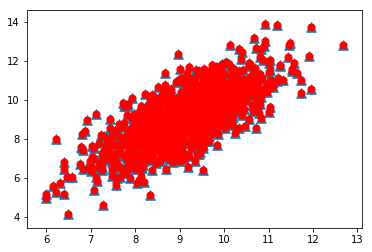

(1567, 590)
主成分： 1, 方差占比：59.25%, 累积方差占比：59.3%
主成分： 2, 方差占比：24.12%, 累积方差占比：83.4%
主成分： 3, 方差占比：9.15%, 累积方差占比：92.5%
主成分： 4, 方差占比：2.30%, 累积方差占比：94.8%
主成分： 5, 方差占比：1.46%, 累积方差占比：96.3%
主成分： 6, 方差占比：0.52%, 累积方差占比：96.8%
主成分： 7, 方差占比：0.32%, 累积方差占比：97.1%
主成分： 8, 方差占比：0.31%, 累积方差占比：97.4%
主成分： 9, 方差占比：0.26%, 累积方差占比：97.7%
主成分：10, 方差占比：0.23%, 累积方差占比：97.9%
主成分：11, 方差占比：0.22%, 累积方差占比：98.2%
主成分：12, 方差占比：0.21%, 累积方差占比：98.4%
主成分：13, 方差占比：0.17%, 累积方差占比：98.5%
主成分：14, 方差占比：0.13%, 累积方差占比：98.7%
主成分：15, 方差占比：0.12%, 累积方差占比：98.8%
主成分：16, 方差占比：0.11%, 累积方差占比：98.9%
主成分：17, 方差占比：0.11%, 累积方差占比：99.0%
主成分：18, 方差占比：0.09%, 累积方差占比：99.1%
主成分：19, 方差占比：0.09%, 累积方差占比：99.2%
主成分：20, 方差占比：0.09%, 累积方差占比：99.3%
(1567, 20)


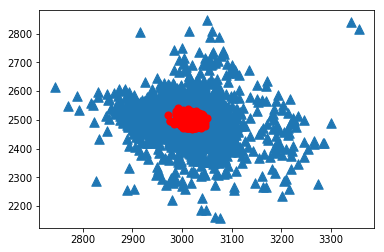

In [8]:
##项目完整代码：

def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    #注意这里和python2的区别，需要在map函数外加一个list（），否则显示结果为 map at 0x3fed1d0
    return mat(datArr)


def pca(dataMat, topNfeat=9999999):
    """pca

    Args:
        dataMat   原数据集矩阵
        topNfeat  应用的N个特征
    Returns:
        lowDDataMat  降维后数据集
        reconMat     新的数据集空间
    """

    # 计算每一列的均值
    meanVals = mean(dataMat, axis=0)
    # print('meanVals', meanVals)

    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # print('meanRemoved=', meanRemoved)

    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度

    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = cov(meanRemoved, rowvar=0)

    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = linalg.eig(mat(covMat))
    # print('eigVals=', eigVals)
    # print('eigVects=', eigVects)
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    '''
    >>> x = np.array([3, 1, 2])
    >>> np.argsort(x)
    array([1, 2, 0])  # index,1 = 1; index,2 = 2; index,0 = 3
    >>> y = np.argsort(x)
    >>> y[::-1]
    array([0, 2, 1])
    >>> y[:-3:-1]
    array([0, 2])  # 取出 -1, -2
    >>> y[:-6:-1]
    array([0, 2, 1])
    '''
    eigValInd = argsort(eigVals)
    # print('eigValInd1=', eigValInd)

    # -1表示倒序，返回topN的特征值[-1 到 -(topNfeat+1) 但是不包括-(topNfeat+1)本身的倒叙]
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # print('eigValInd2=', eigValInd)
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    # print('redEigVects=', redEigVects.T)
    # 将数据转换到新空间
    # print( "---", shape(meanRemoved), shape(redEigVects))
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    # print('lowDDataMat=', lowDDataMat)
    # print('reconMat=', reconMat)
    return lowDDataMat, reconMat


def replaceNanWithMean():
    datMat = loadDataSet('./dataset/secom.data', ' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(isnan(datMat[:, i].A))[0],i] = meanVal
    return datMat


def show_picture(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='red')
    plt.show()


def analyse_data(dataMat):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat-meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigvals, eigVects = linalg.eig(mat(covMat))
    eigValInd = argsort(eigvals)

    topNfeat = 20
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    cov_all_score = float(sum(eigvals))
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        line_cov_score = float(eigvals[eigValInd[i]])
        sum_cov_score += line_cov_score
        '''
        我们发现其中有超过20%的特征值都是0。
        这就意味着这些特征都是其他特征的副本，也就是说，它们可以通过其他特征来表示，而本身并没有提供额外的信息。

        最前面15个值的数量级大于10^5，实际上那以后的值都变得非常小。
        这就相当于告诉我们只有部分重要特征，重要特征的数目也很快就会下降。

        最后，我们可能会注意到有一些小的负值，他们主要源自数值误差应该四舍五入成0.
        '''
        print('主成分：%s, 方差占比：%s%%, 累积方差占比：%s%%' % (format(i+1, '2.0f'), format(line_cov_score/cov_all_score*100, '4.2f'), format(sum_cov_score/cov_all_score*100, '4.1f')))


if __name__ == "__main__":
    # # 加载数据，并转化数据类型为float
    dataMat = loadDataSet('./dataset/testSet.txt')
    # # 只需要1个特征向量
    lowDmat, reconMat = pca(dataMat, 1)
    # # 只需要2个特征向量，和原始数据一致，没任何变化
    lowDmat, reconMat = pca(dataMat, 2)
    print(shape(lowDmat))
    show_picture(dataMat, reconMat)

    # 利用PCA对半导体制造数据降维
    dataMat = replaceNanWithMean()
    print(shape(dataMat))
    # 分析数据
    analyse_data(dataMat)
    lowDmat, reconMat = pca(dataMat, 20)
    print(shape(lowDmat))
    show_picture(dataMat, reconMat)


## 要点补充 

降维技术使得数据变的更易使用，并且它们往往能够去除数据中的噪音，使得其他机器学习任务更加精确。

降维往往作为预处理步骤，在数据应用到其他算法之前清洗数据。

比较流行的降维技术： 独立成分分析、因子分析 和 主成分分析， 其中又以主成分分析应用最广泛。

本章中的PCA将所有的数据集都调入了内存，如果无法做到，就需要其他的方法来寻找其特征值。

如果使用在线PCA分析的方法，你可以参考一篇优秀的论文 "Incremental Eigenanalysis for Classification"。 

下一章要讨论的奇异值分解方法也可以用于特征值分析。
